In [ ]:
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt

from abc import ABC, abstractmethod
from typing import Optional

# K-armed Testbed

This is the basic environment for the k-armed bandit problem as discussed in Sutton & Barto.

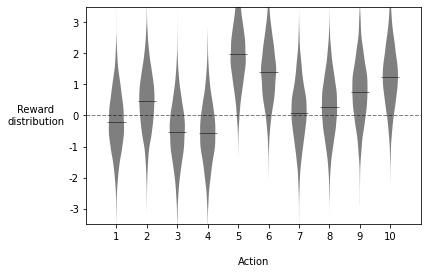

In [1]:
import matplotlib.pyplot as plt
from environments import KArmedBandit

env = KArmedBandit(k=10, seed=12345)
fig, ax = plt.subplots()
env.plot_reward_dists(ax)

Clearly Action $a=5$ has the highest expected reward.